In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

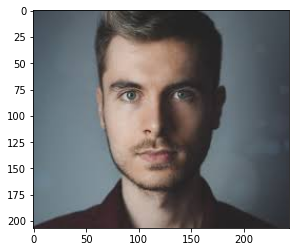

In [2]:
img = plt.imread('Downloads/Human_face/male_face/1.jpg')
plt.imshow(img)

In [3]:
from skimage import io, filters

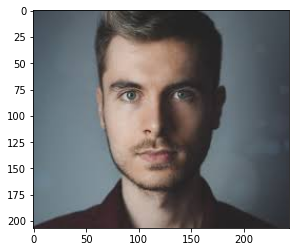

In [4]:
edges = filters.sobel(img)
plt.imshow(img)

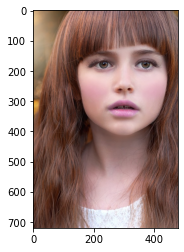

In [5]:
img = plt.imread('Downloads/Human_face/female_face/1.jpg')
plt.imshow(img)

In [6]:
from skimage import io, filters

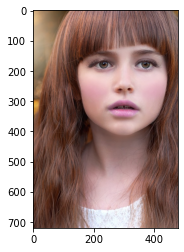

In [7]:
edges = filters.sobel(img)
plt.imshow(img)

In [8]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """Loading Multiple Images From the Folder and Which Consists  of Different Shape of Data We Have to Bring them in 64 ,64 Shape
    as well as 
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[male_face,female_face] 
    Each and Every category[male_face, female_face]
    Dimensions: We Have Bring Ddifferent Images into Same equal shape
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr ="""male_face and female_face Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # Convert Image Sahpe in 64 ,64
            img_resized =resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images= images,
                DESCR =descr )

ValueError: could not broadcast input array from shape (64,64,3) into shape (64,64)

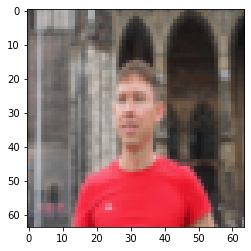

In [9]:
import skimage
image_dataset = load_image_files("Downloads/Human_face")